## Process sea ice topographical features in the Weddell Sea

In [24]:
import warnings
warnings.filterwarnings('ignore')

import os, glob
import csv
import numpy as np
# import icepyx as ipx
from os import listdir
from os.path import isfile, join
import h5py
import matplotlib.pylab as plt
from math import *
import random
# import time
import pandas as pd
from tqdm import tqdm
import pickle

import cartopy.crs as ccrs
import datetime as dt
from shapely.geometry import Point
import geopandas
import scipy.stats as stats
import netCDF4
from netCDF4 import Dataset    # Note: python is case-sensitive!
from netCDF4 import date2num,num2date

from pyproj import Proj, transform
from shapely.geometry import Polygon
from sklearn.neighbors import KernelDensity

%load_ext autoreload
%autoreload 2
from functions import *
from readers import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
ncname = r"D:\PINN\data\SH\Sea_ice_drift\icemotion_weekly_sh_25km_20190101_20191231_v4.1.nc"
ds = xr.open_dataset(ncname)

In [11]:
x = np.array(ds.x)
y = np.array(ds.y)
xx, yy = np.meshgrid(x, y)

In [12]:
u = np.array(ds.u)

In [20]:
ds.time

<xarray.DataArray 'time' (time: 52)> Size: 416B
array([cftime.DatetimeJulian(2019, 1, 1, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 1, 8, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 1, 15, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 1, 22, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 1, 29, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 2, 5, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 2, 12, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 2, 19, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 2, 26, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 3, 5, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 3, 12, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 3, 19, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 3, 26, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 4, 2, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 4, 9, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 4, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 4, 23, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 4, 30, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 5, 7, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 5, 14, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 5, 21, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 5, 28, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 6, 4, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 6, 11, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 6, 18, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 6, 25, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 7, 2, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 7, 9, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 7, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 7, 23, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 7, 30, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 8, 6, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 8, 13, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 8, 20, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 8, 27, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 9, 3, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 9, 10, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 9, 17, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 9, 24, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 10, 1, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 10, 8, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 10, 15, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 10, 22, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 10, 29, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 11, 5, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 11, 12, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 11, 19, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 11, 26, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 12, 3, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 12, 10, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 12, 17, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(

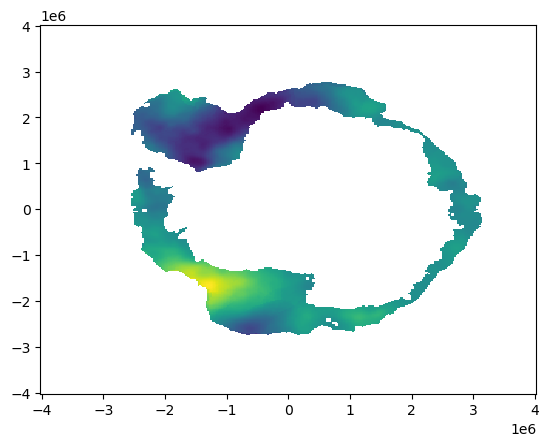

In [18]:
plt.pcolormesh(xx, yy, u[20])

In [6]:
ds

<xarray.Dataset> Size: 65MB
Dimensions:                 (x: 321, y: 321, time: 52)
Coordinates:
  * x                       (x) float64 3kB -4.011e+06 -3.986e+06 ... 4.011e+06
  * y                       (y) float64 3kB -4.011e+06 -3.986e+06 ... 4.011e+06
  * time                    (time) object 416B 2019-01-01 12:00:00 ... 2019-1...
Data variables:
    crs                     int32 4B ...
    u                       (time, y, x) float32 21MB ...
    v                       (time, y, x) float32 21MB ...
    number_of_observations  (time, y, x) float32 21MB ...
    latitude                (y, x) float32 412kB ...
    longitude               (y, x) float32 412kB ...
Attributes:
    version:       4.1
    release_date:  July 2020
    Conventions:   CF-1.4
    citation:      Tschudi, M. A., Meier, W. N., and Stewart, J. S.: An enhan...
    dataset_doi:   10.5067/INAWUWO7QH7B

In [25]:
# All ATL10 files stored in a folder
# target_year = 2019
# files = glob.glob(f"D:\\Ross\\ATL10_h5\\ATL10-02_{target_year}*.h5")

th_fb = 0.8
ib_filtering = True

## Grid setting ====================================================
## =================================================================

for target_year in [2019, 2020, 2021, 2022, 2023]:
    print(target_year)
    files = glob.glob(f"D:\\Ross\\ATL10_h5\\ATL10-02_{target_year}*.h5")
    
    bbox = [160, -80, -150, -60] # Ross Sea
    
    nc_name = 'D:\\IS2_topo_DL\\Ridges_density_Ross_{0}.nc'.format(target_year)
    
    with Dataset(nc_name, mode='w') as ncfile:
        
        # INITIALIZE NC FILE ==================================================================
        # Make grid for Weddell Sea (projection: NSIDC sea ice polar stereographic South - EPSG 3412)
        xp = np.arange(-2000000, 1500001, 25000)
        yp = np.arange(-3200000, -800001, 25000)

        xx, yy = np.meshgrid(xp, yp)
        lats, lons = transform(Proj("EPSG:3412"), Proj("EPSG:4326"), xx, yy) 

        x_len = len(xp)
        y_len = len(yp)
        
        # CREATE NC FILE VARIABLES ================================
        x_dim = ncfile.createDimension('x', x_len)     # latitude axis
        y_dim = ncfile.createDimension('y', y_len)    # longitude axis
        time_dim = ncfile.createDimension('time', None) # unlimited axis (can be appended to).
        for dim in ncfile.dimensions.items():
            print(dim)

        ## XY grid ================================================
        x = ncfile.createVariable('x', np.float32, ('x',))
        x.units = 'meters'
        x.long_name = 'Center_x_values'
        y = ncfile.createVariable('y', np.float32, ('y',))
        y.units = 'meters'
        y.long_name = 'Center_y_values'

        ## Time ================================================
        time = ncfile.createVariable('time', np.float64, ('time',))
        time.units = 'hours since 1800-01-01'
        time.long_name = 'time'

        ## latitude & longitude ================================================
        latitude = ncfile.createVariable('lat', np.float64,('y','x',)) # note: unlimited dimension is leftmost
        latitude.units = 'degrees_north' # degrees Kelvin
        latitude.long_name = "latitude"

        longitude = ncfile.createVariable('lon', np.float64,('y','x',)) # note: unlimited dimension is leftmost
        longitude.units = 'degrees_east' # degrees Kelvin
        longitude.long_name = "longitude"

        ## Data variables ================================================
        fb_mode = ncfile.createVariable('fb_mode', np.float64,('time','x','y')) # note: unlimited dimension is leftmost
        fb_mode.units = 'meters' # degrees meter
        fb_mode.standard_name = 'modal_freeboard' # this is a CF standard name
        
        fb_mean = ncfile.createVariable('fb_mean', np.float64,('time','x','y')) # note: unlimited dimension is leftmost
        fb_mean.units = 'meters' # degrees meter
        fb_mean.standard_name = 'mean_freeboard' # this is a CF standard name
        
        fb_med = ncfile.createVariable('fb_med', np.float64,('time','x','y')) # note: unlimited dimension is leftmost
        fb_med.units = 'meters' # degrees meter
        fb_med.standard_name = 'median_freeboard' # this is a CF standard name
        
        fb_std = ncfile.createVariable('fb_std', np.float64,('time','x','y')) # note: unlimited dimension is leftmost
        fb_std.units = 'meters' # degrees meter
        fb_std.standard_name = 'standard_deviation_freeboard' # this is a CF standard name

        fr_ridge = ncfile.createVariable('fr_ridge', np.float64,('time','x','y')) # note: unlimited dimension is leftmost
        # fr_ridge.units = 'meters' # no units
        fr_ridge.standard_name = 'ridge_fraction' # this is a CF standard name

        h_ridge = ncfile.createVariable('h_ridge', np.float64,('time','x','y')) # note: unlimited dimension is leftmost
        h_ridge.units = 'meters' # degrees meter
        h_ridge.standard_name = 'mean_ridge_height' # this is a CF standard name

        fr_lead = ncfile.createVariable('fr_lead', np.float64,('time','x','y')) # note: unlimited dimension is leftmost
        # fr_lead.units = 'meters' # no units
        fr_lead.standard_name = 'lead_fraction' # this is a CF standard name

        fb_count = ncfile.createVariable('fb_count', np.float64,('time','x','y')) # note: unlimited dimension is leftmost
        # fr_lead.units = 'meters' # no units
        fb_count.standard_name = 'Number of ATL10 freeboard measurement points' # this is a CF standard name

        ib_cnt = ncfile.createVariable('ib_cnt', np.float64,('time','x','y')) # note: unlimited dimension is leftmost
        # floe_cnt.units = 'meters' # no units
        ib_cnt.standard_name = 'number of icebergs/landfast ice' # this is a CF standard name
        
        x[:] = xp
        y[:] = yp

        latitude[:] = lats
        longitude[:] = lons
        ## ============================================================================
        
        nc_idx = 0

        # Initializing freeboard distribution bin ranges
        step = 0.1
        ITD_bin_ranges = np.arange(0, 4.0+step, step) #np.arange(0.1, 1.5, num=50)
        ITD_bins = 0.5*(ITD_bin_ranges[0:-1] + ITD_bin_ranges[1:])

        #### ITD parameters ####
        cnt_file = 0
        ITD_all = np.zeros((len(ITD_bins),len(files)))
        year_all = np.zeros(len(files))
        month_all = np.zeros(len(files))
        day_all = np.zeros(len(files))
        valid_idx = []

        #### Floe parameters ####
        floe_year = np.array([])
        floe_month = np.array([])
        floe_day = np.array([])
        floe_len = np.array([])
        floe_lat = np.array([])
        floe_lon = np.array([])
        floe_fb_mean = np.array([])
        floe_fb_med = np.array([])
        floe_fb_std = np.array([])
        lead_width = np.array([])
        lead_position = np.array([])
        nprof = 50

        #### Lead parameters ####
        lead_width_bin_ranges = np.arange(10, 3000, 10)
        lead_width_bin_means = 0.5*(lead_width_bin_ranges[0:-1] + lead_width_bin_ranges[1:])
        binned_lead_count_all = np.zeros((len(lead_width_bin_means), len(files)))
        binned_lead_spacings_all = np.zeros((len(lead_width_bin_means), len(files)))

        first = True
        
        ## LOOP FOR ALL ATL10 FILES =================================================
        for k in tqdm(range(0, len(files))):
            filename = files[k]
            date = os.path.basename(filename)[9:9+14]
            year = int(date[:4])
            month = int(date[4:6])
            day = int(date[6:8])
            valid_beam = 0

            year_all[k] = year
            month_all[k] = month
            day_all[k] = day

            first_beam = True
            first_floe = True
            first_ib = True
            
            # Initialize grid (for nc file) -----------------------------------------
            grid_fb_mode = np.zeros(np.shape(xx)) * np.nan
            grid_fb_std = np.zeros(np.shape(xx)) * np.nan
            grid_fr_ridge = np.zeros(np.shape(xx)) * np.nan
            grid_h_ridge = np.zeros(np.shape(xx)) * np.nan
            grid_fr_lead = np.zeros(np.shape(xx)) * np.nan
            grid_floe_leng = np.zeros(np.shape(xx)) * np.nan
            grid_floe_cnt = np.zeros(np.shape(xx)) * np.nan
            grid_ib_cnt = np.zeros(np.shape(xx)) * np.nan
        
            polygons = []
            w = 12500
            for xi in xp[:]:
                for yi in yp[:]:
                    polygons.append(Polygon([(xi-w,yi-w), (xi+w, yi-w), (xi+w, yi+w), (xi-w, yi+w)]))

            grid = geopandas.GeoDataFrame({'geometry':polygons}, crs = "EPSG:3412")
            grid['id'] = grid.index
            # -----------------------------------------------------------------
            
            df2 = pd.DataFrame({'lat': [], 'lon': []})
            df_floe = pd.DataFrame({'lat': [], 'lon': [], 'floe_len': []})

            df_raw = read_ATL10(filename, bbox)

            if len(df_raw) > 0:

                strong_beams = pd.unique(df_raw['beam'])

                for beam in strong_beams:

                    df = df_raw.loc[df_raw['beam']==beam, :].reset_index(drop = True)
                    
                    ib_mask2, df_ib = determine_iceberg(df, th_fb = th_fb)
                    df_ib2, ib_mask3 = combine_icebergs(df, df_ib, ib_mask2, th_fb)

                    ########## APPLY Iceberg Filting (YES or NO) ##########
                    if len(df_ib2) > 0:
                        if first_ib:
                            df_ib_all = df_ib2
                            first_ib = False
                        else:
                            df_ib_all = pd.concat([df_ib_all, df_ib2]).reset_index(drop = True)
                        
                    if ib_filtering:
                        df = df[ib_mask3 == 0].reset_index(drop = True)
                    ######################################################
                    lat = df['lat'].values
                    lon = df['lon'].values
                    seg_x = df['seg_x'].values
                    seg_len = df['seg_len'].values
                    fb = df['fb'].values
                    stype = df['stype'].values
                    refsur_ndx = df['refsur_ndx'].values

                    freeboard_mode, sample_ndx = modal_profile(fb, seg_x, refsur_ndx)

                    ridge = np.zeros(np.shape(fb))
                    # Ridge or not? (threshold 0.6 m above level (mode) freeboard)
                    ridge[fb > freeboard_mode + 0.6] = 1

                    df['fb_mode'] = freeboard_mode
                    df['ridge'] = ridge

                    # DETERMINE LEAD --------------------------------------------------
                    lead_mask = np.zeros(len(fb))
                    lead_mask[(stype <= 5) & (stype>= 2) & (fb < 0.1)] = 1 # Specular lead
                    # lead_mask[(stype <= 9) & (stype>= 2) & (fb < 0.1)] = 1 # Specular & dark lead
                    # ------------------------------------------------------------------
                                
                    df['lead'] = lead_mask

                    if len(df) > 0 and np.sum(np.isnan(fb)) != len(fb):
                        
                        first_beam = False

                        if k not in valid_idx:
                            valid_idx.append(k)
                        
                        df = df.dropna().reset_index(drop = True)
                        
                        df2 = pd.concat([df2, df], ignore_index=True)
                        
            if first_beam == False:
                
                # Combine the results to the NC file grid -------------------------------------
                gdf = geopandas.GeoDataFrame(df2, crs="EPSG:4326",
                                             geometry=geopandas.points_from_xy(df2.lon, df2.lat)).to_crs("EPSG:3412")

                # gdf_floe = geopandas.GeoDataFrame(df_floe, crs="EPSG:4326",
                #                                   geometry=geopandas.points_from_xy(df_floe.lon, df_floe.lat)).to_crs("EPSG:3412")
                # gdf_floe = gdf_floe.sjoin(grid, how="left").dropna()

                left_df = gdf.sjoin(grid, how="left").dropna()

                ridge = left_df.groupby("id").apply(calculate_ridge)
                array_fb_mode = [s[0] for s in ridge.values]
                array_fr_ridge = [s[1] for s in ridge.values]
                array_h_ridge = [s[2] for s in ridge.values]
                array_fb_mean = [s[3] for s in ridge.values]
                array_fb_med = [s[4] for s in ridge.values]
                array_fb_std = [s[5] for s in ridge.values]
                array_fr_lead = left_df.groupby("id")["lead"].apply(calculate_lead).values
                array_fb_count = left_df.groupby("id")["lat"].count()
                
                # array_floe_len = gdf_floe.groupby("id")["floe_len"].mean()
                # array_floe_cnt = gdf_floe.groupby("id")["lat"].count()

                grid.loc[ridge.index, "fb_mode"] = array_fb_mode
                grid.loc[ridge.index, "fr_ridge"] = array_fr_ridge
                grid.loc[ridge.index, "h_ridge"] = array_h_ridge
                grid.loc[ridge.index, "fb_mean"] = array_fb_mean
                grid.loc[ridge.index, "fb_med"] = array_fb_med
                grid.loc[ridge.index, "fb_std"] = array_fb_std
                grid.loc[ridge.index, "fr_lead"] = array_fr_lead
                grid.loc[ridge.index, "fb_count"] = array_fb_count
                # grid.loc[array_floe_cnt.index, "floe_len"] = array_floe_len.values
                # grid.loc[array_floe_cnt.index, "floe_cnt"] = array_floe_cnt.values

                fb_mode[nc_idx ,:,:] = grid["fb_mode"].values.reshape(np.shape(xx)) #.transpose()
                fb_mean[nc_idx ,:,:] = grid["fb_mean"].values.reshape(np.shape(xx)) #.transpose()
                fb_med[nc_idx ,:,:] = grid["fb_med"].values.reshape(np.shape(xx)) #.transpose()
                fb_std[nc_idx ,:,:] = grid["fb_std"].values.reshape(np.shape(xx)) #.transpose()
                fr_ridge[nc_idx ,:,:] = grid["fr_ridge"].values.reshape(np.shape(xx)) #.transpose()
                h_ridge[nc_idx ,:,:] = grid["h_ridge"].values.reshape(np.shape(xx)) #.transpose()
                fr_lead[nc_idx ,:,:] = grid["fr_lead"].values.reshape(np.shape(xx)) #.transpose()
                fb_count[nc_idx,:,:] = grid["fb_count"].values.reshape(np.shape(xx))
                
                # floe_leng[nc_idx ,:,:] = grid["floe_len"].values.reshape(np.shape(xx)).transpose()
                # floe_cnt[nc_idx ,:,:] = grid["floe_cnt"].values.reshape(np.shape(xx)).transpose()
                time[nc_idx] = date2num(dt.datetime.strptime(date, "%Y%m%d%H%M%S"), time.units)
                
                if first_ib == False:

                    gdf_ib = geopandas.GeoDataFrame(df_ib_all, crs="EPSG:4326",
                                                    geometry=geopandas.points_from_xy(df_ib_all.lon, df_ib_all.lat)).to_crs("EPSG:3412")
                    gdf_ib = gdf_ib.sjoin(grid, how="left").dropna()

                    array_ib_cnt = gdf_ib.groupby("id")["lat"].count()   
                    grid.loc[array_ib_cnt.index, "ib_cnt"] = array_ib_cnt.values
                    grid_ib_cnt = grid["ib_cnt"].values.reshape(np.shape(xx)).transpose()
                    
                ib_cnt[nc_idx ,:,:] = grid_ib_cnt

                nc_idx += 1


2019
('x', <class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 141)
('y', <class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 96)
('time', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 0)


100%|████████████████████████████████████████████████████████████████████████████| 1307/1307 [1:34:48<00:00,  4.35s/it]


2020
('x', <class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 141)
('y', <class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 96)
('time', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 0)


100%|████████████████████████████████████████████████████████████████████████████| 1470/1470 [1:39:51<00:00,  4.08s/it]


2021
('x', <class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 141)
('y', <class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 96)
('time', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 0)


100%|████████████████████████████████████████████████████████████████████████████| 1508/1508 [1:48:36<00:00,  4.32s/it]


2022
('x', <class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 141)
('y', <class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 96)
('time', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 0)


100%|████████████████████████████████████████████████████████████████████████████| 1373/1373 [1:47:02<00:00,  4.68s/it]


2023
('x', <class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 141)
('y', <class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 96)
('time', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 0)


100%|████████████████████████████████████████████████████████████████████████████| 1356/1356 [1:33:21<00:00,  4.13s/it]
